In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
df = pd.read_csv('Pass-Fail Data.csv')

In [3]:
df.head()

,student_id,attendance_pct,homework_pct,midterm_score,study_hours_per_week,pass
0,1,95,92,88,12,1
1,2,88,85,79,10,1
2,3,60,55,58,4,0
3,4,72,70,65,6,1
4,5,40,45,50,3,0


In [5]:
df.describe()

,student_id,attendance_pct,homework_pct,midterm_score,study_hours_per_week,pass
count,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000
mean,50.500000,69.520000,69.03000,68.780000,7.28000,0.600000
std,29.011492,17.651783,17.01304,14.717254,3.62115,0.492366
min,1.000000,30.000000,35.00000,42.000000,2.00000,0.000000
25%,25.750000,55.000000,55.00000,56.000000,4.00000,0.000000
50%,50.500000,72.500000,70.00000,68.000000,7.00000,1.000000
75%,75.250000,85.000000,85.00000,82.000000,10.00000,1.000000
max,100.000000,95.000000,96.00000,97.000000,15.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   student_id            100 non-null    int64
 1   attendance_pct        100 non-null    int64
 2   homework_pct          100 non-null    int64
 3   midterm_score         100 non-null    int64
 4   study_hours_per_week  100 non-null    int64
 5   pass                  100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


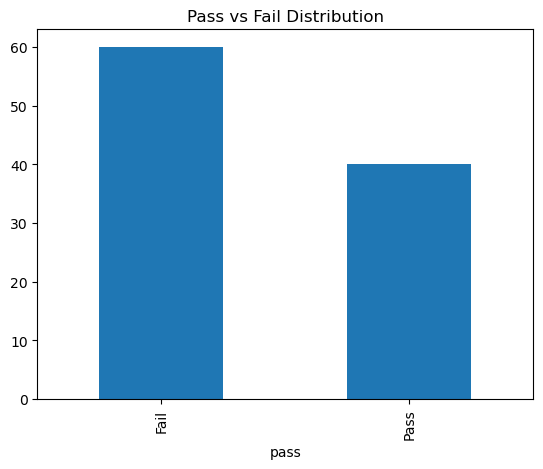

In [8]:
df["pass"].value_counts().plot(kind="bar")
plt.title("Pass vs Fail Distribution")
plt.xticks([0,1], ["Fail","Pass"])
plt.show()

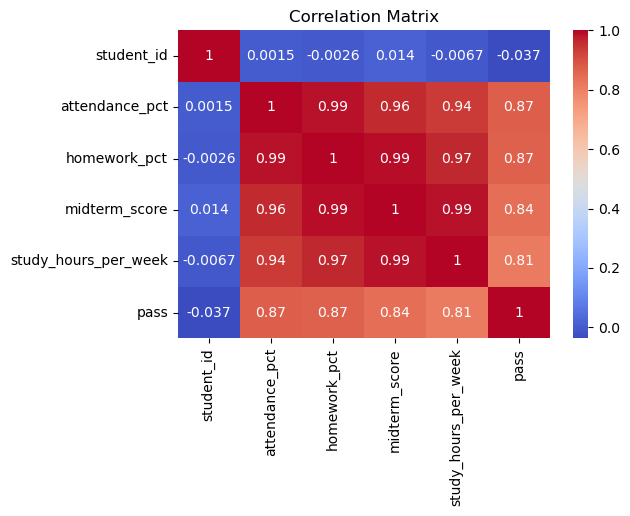

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [10]:
df.drop("student_id", axis=1, inplace=True)

In [11]:
X = df.drop("pass",axis=1)
y = df["pass"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nAccuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
 [[ 8  0]
 [ 0 12]]
